<h2 align=center>Tumor Diagnosis (Part 1): Exploratory Data Analysis</h2>
<img src="https://storage.googleapis.com/kaggle-datasets-images/180/384/3da2510581f9d3b902307ff8d06fe327/dataset-cover.jpg">


### About the Dataset:

The [Breast Cancer Diagnostic data](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29) is available on the UCI Machine Learning Repository. This database is also available through the [UW CS ftp server](http://ftp.cs.wisc.edu/math-prog/cpo-dataset/machine-learn/cancer/WDBC/).

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

**Attribute Information**:

- ID number
- Diagnosis (M = malignant, B = benign) 3-32)

Ten real-valued features are computed for each cell nucleus:

1. radius (mean of distances from center to points on the perimeter) 
2. texture (standard deviation of gray-scale values) 
3. perimeter 
4. area 
5. smoothness (local variation in radius lengths) 
6. compactness (perimeter^2 / area - 1.0) 
7. concavity (severity of concave portions of the contour) 
8. concave points (number of concave portions of the contour)
9. symmetry
10. fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

### Task 1: Loading Libraries and Data

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns  # data visualization library  
import matplotlib.pyplot as plt
import time

In [2]:
#importing the data from data.csv
data = pd.read_csv('data.csv')

In [3]:
#exploring the first 5 rows of the data
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


<h2 align=center> Exploratory Data Analysis </h2>

---

### Task 2: Separate Target from Features
***
In this task we will separate the features into a dataframe and the class labels into another.
***

In [4]:
col = data.columns
print(col)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


In [5]:
# exploring data types and null values in the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [6]:
#first we will save the diagnosis into a dataframe of class-labels
y= data.diagnosis
#now we will specify the columns to drop from our dataframe: Unnamed: 32, id, diagonsis
drop_cols=['Unnamed: 32','id','diagnosis']
# now we will construct our dataframe for the features that we will explore without the columns in drop_cols
x = data.drop(drop_cols,axis = 1)
#explore the x dataframe
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Task 3: Plot Diagnosis Distributions
***
We will explore the target variable (labels) and how they are distributed.
***

Number of Benign Tumors:  357
Number of Malignant Tumors:  212


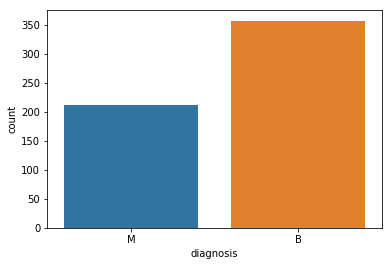

In [7]:
# 1- checking for class imbalance(one of the reasons that the classifier model is underperforming ) using a histogram or a barplot
ax = sns.countplot(y,label='Count')
B,M =y.value_counts()
print('Number of Benign Tumors: ', B)
print('Number of Malignant Tumors: ',M)


We have a class imbalance that will be dealt with in the next project

In [8]:
# exploring our features dataframe and their descriptive analysis
x.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


We need to normalize our features before going into analysis, as the ranges and order of magnitude varies largely (e.g. mean area and smoothness)

<h2 align=center> Data Visualization </h2>

---

### Task 4: Visualizing Standardized Data with Seaborn
***
Largely different ranges of feature will cause the weights of the features for our model to be non-uniformaly distributed. To solve the problem we will normalize the features.
***

In [10]:
# normalizing/standerdizing features of the model
data = x
data_std = (data - data.mean())/data.std()
data = pd.concat([y,data_std.iloc[:,0:10]], axis = 1)
# now the data are in long format and it needs to be 
#unpivoted to a wide format use it with the violinplot function
data = pd.melt(data, id_vars = 'diagnosis',
              var_name = 'features',
              value_name = 'value')

In [11]:
data.head()

,diagnosis,features,value
0,M,radius_mean,1.096100
1,M,radius_mean,1.828212
2,M,radius_mean,1.578499
3,M,radius_mean,-0.768233
4,M,radius_mean,1.748758


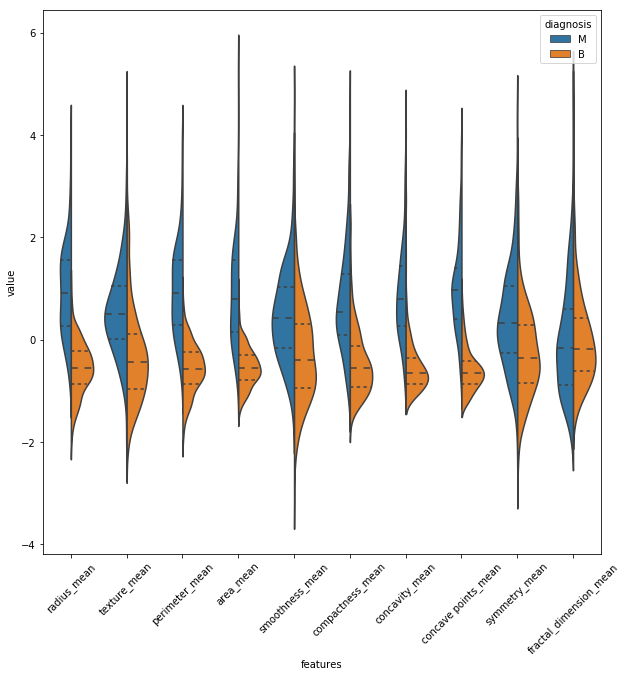

In [12]:
plt.figure(figsize=(10,10))
sns.violinplot(x= 'features', y='value', hue='diagnosis', data=data, split = True, inner='quart')
plt.xticks(rotation=45);

From the violin plot, we choose the features with separated medians. They provide good features for classification. Potential good features are texture_mean, area_mean and concavity_mean.

### Task 5: Violin Plots and Box Plots
***
Note: If you are starting the notebook from this task, you can run cells from all the previous tasks in the kernel by going to the top menu and Kernel > Restart and Run All
***

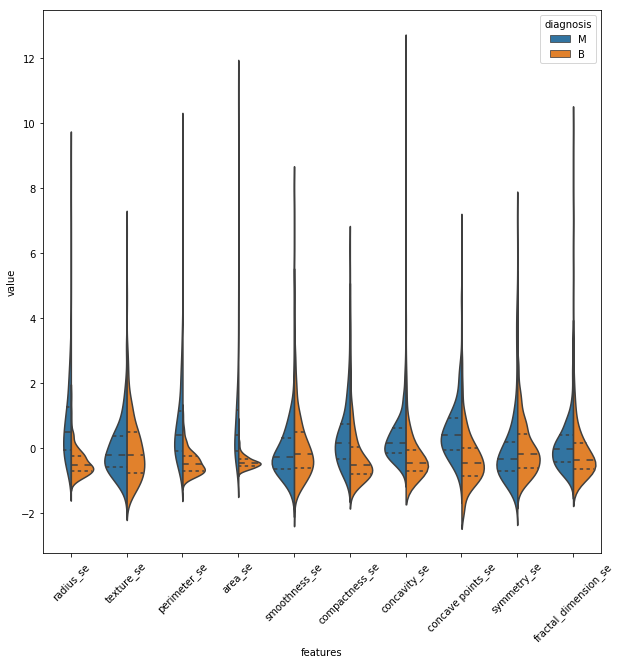

In [13]:
data = pd.concat([y,data_std.iloc[:,10:20]], axis = 1)
# now the data are in long format and it needs to be 
#unpivoted to a wide format use it with the violinplot function
data = pd.melt(data, id_vars = 'diagnosis',
              var_name = 'features',
              value_name = 'value')
plt.figure(figsize=(10,10))
sns.violinplot(x= 'features', y='value', hue='diagnosis', data=data, split = True, inner='quart')
plt.xticks(rotation=45);

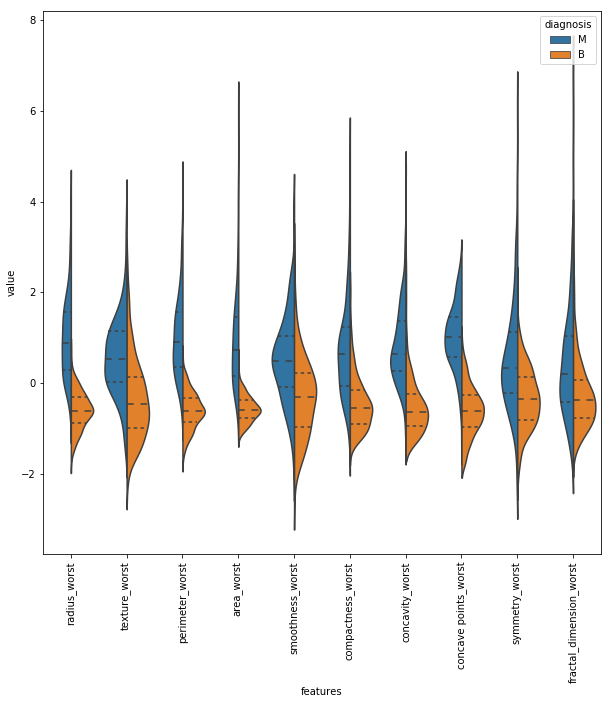

In [19]:
data = pd.concat([y,data_std.iloc[:,20:30]], axis = 1)
# now the data are in long format and it needs to be 
#unpivoted to a wide format use it with the violinplot function
data = pd.melt(data, id_vars = 'diagnosis',
              var_name = 'features',
              value_name = 'value')
plt.figure(figsize=(10,10))
sns.violinplot(x= 'features', y='value', hue='diagnosis', data=data, split = True, inner='quart')
plt.xticks(rotation=90);

For the similar violinplots, we need to check for the correlation between these feature and drop some of the similar to reduce redundncy.

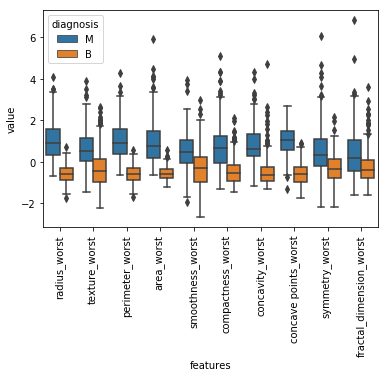

In [22]:
#Cheking for ourliers using boxplot
sns.boxplot(x='features', y='value', hue= 'diagnosis', data=data)
plt.xticks(rotation=90);

### Task 6: Using Joint Plots for Feature Comparison
***
When using correlated features, the classifier is negatively affected. In this section we will perform feature engineering to keep only on of the correlated columns. Using the joint plot to investigate the Pearson Correlation coefficient will guide the elimniation process.
***

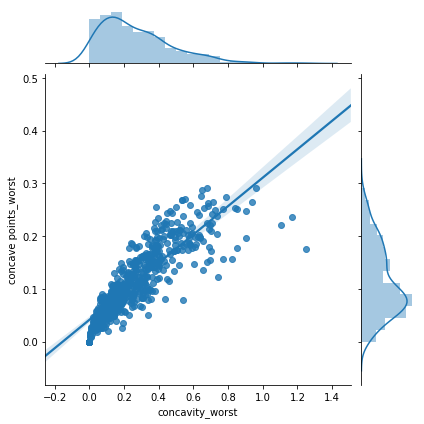

In [25]:
sns.jointplot(x.loc[:,'concavity_worst'],
              x.loc[:,'concave points_worst'],
             kind='regg');

From plot, we can see that these two features are highly correlated.

### Task 7: Observing the Distribution of Values and their Variance with Swarm Plots
***
In this task we will use swarm plots to display every datapoint on the plot. This comes particularly in handy in small datasets. We could use to combine the separate datapoints to the violin and box plots. Then we evaluate the seperability of the features
***

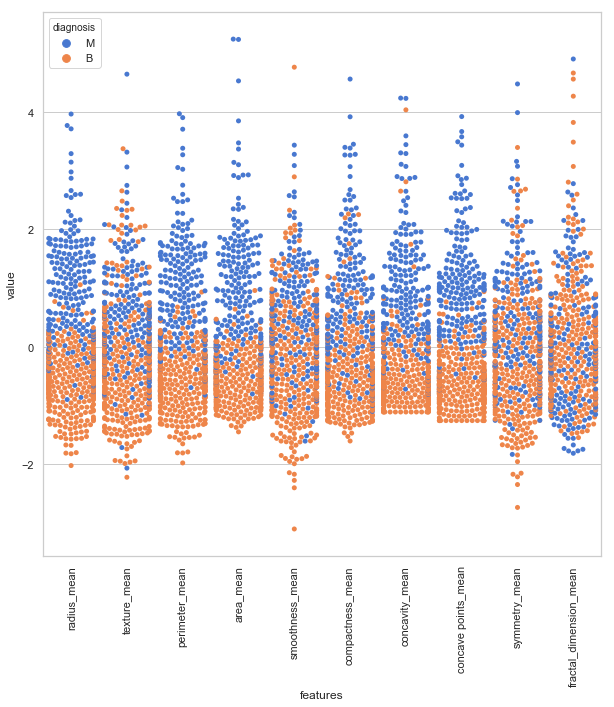

In [26]:
sns.set(style='whitegrid',palette='muted')
data = x
data_std = (data - data.mean())/data.std()
data = pd.concat([y,data_std.iloc[:,0:10]], axis = 1)
# now the data are in long format and it needs to be 
#unpivoted to a wide format use it with the violinplot function
data = pd.melt(data, id_vars = 'diagnosis',
              var_name = 'features',
              value_name = 'value')
plt.figure(figsize=(10,10))
sns.swarmplot(x= 'features', y='value', hue='diagnosis', data=data)
plt.xticks(rotation=90);

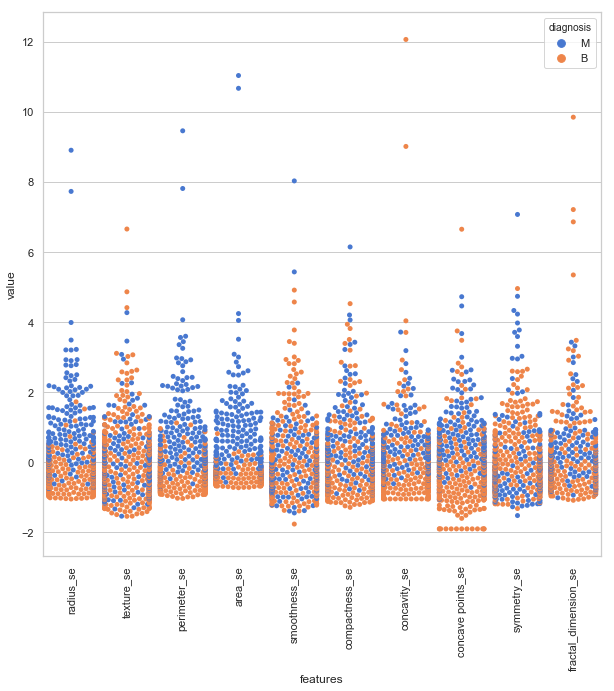

In [27]:
sns.set(style='whitegrid',palette='muted')
data = x
data_std = (data - data.mean())/data.std()
data = pd.concat([y,data_std.iloc[:,10:20]], axis = 1)
# now the data are in long format and it needs to be 
#unpivoted to a wide format use it with the violinplot function
data = pd.melt(data, id_vars = 'diagnosis',
              var_name = 'features',
              value_name = 'value')
plt.figure(figsize=(10,10))
sns.swarmplot(x= 'features', y='value', hue='diagnosis', data=data)
plt.xticks(rotation=90);

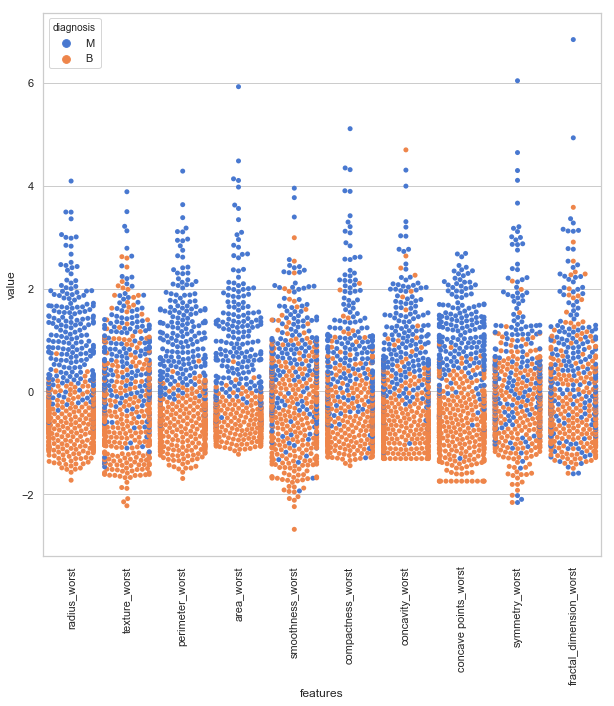

In [28]:
sns.set(style='whitegrid',palette='muted')
data = x
data_std = (data - data.mean())/data.std()
data = pd.concat([y,data_std.iloc[:,20:30]], axis = 1)
# now the data are in long format and it needs to be 
#unpivoted to a wide format use it with the violinplot function
data = pd.melt(data, id_vars = 'diagnosis',
              var_name = 'features',
              value_name = 'value')
plt.figure(figsize=(10,10))
sns.swarmplot(x= 'features', y='value', hue='diagnosis', data=data)
plt.xticks(rotation=90);

### Task 8: Observing all Pair-wise Correlations
***
Now we will investigate the correlation across all featured, pair-wise using heat maps.
***

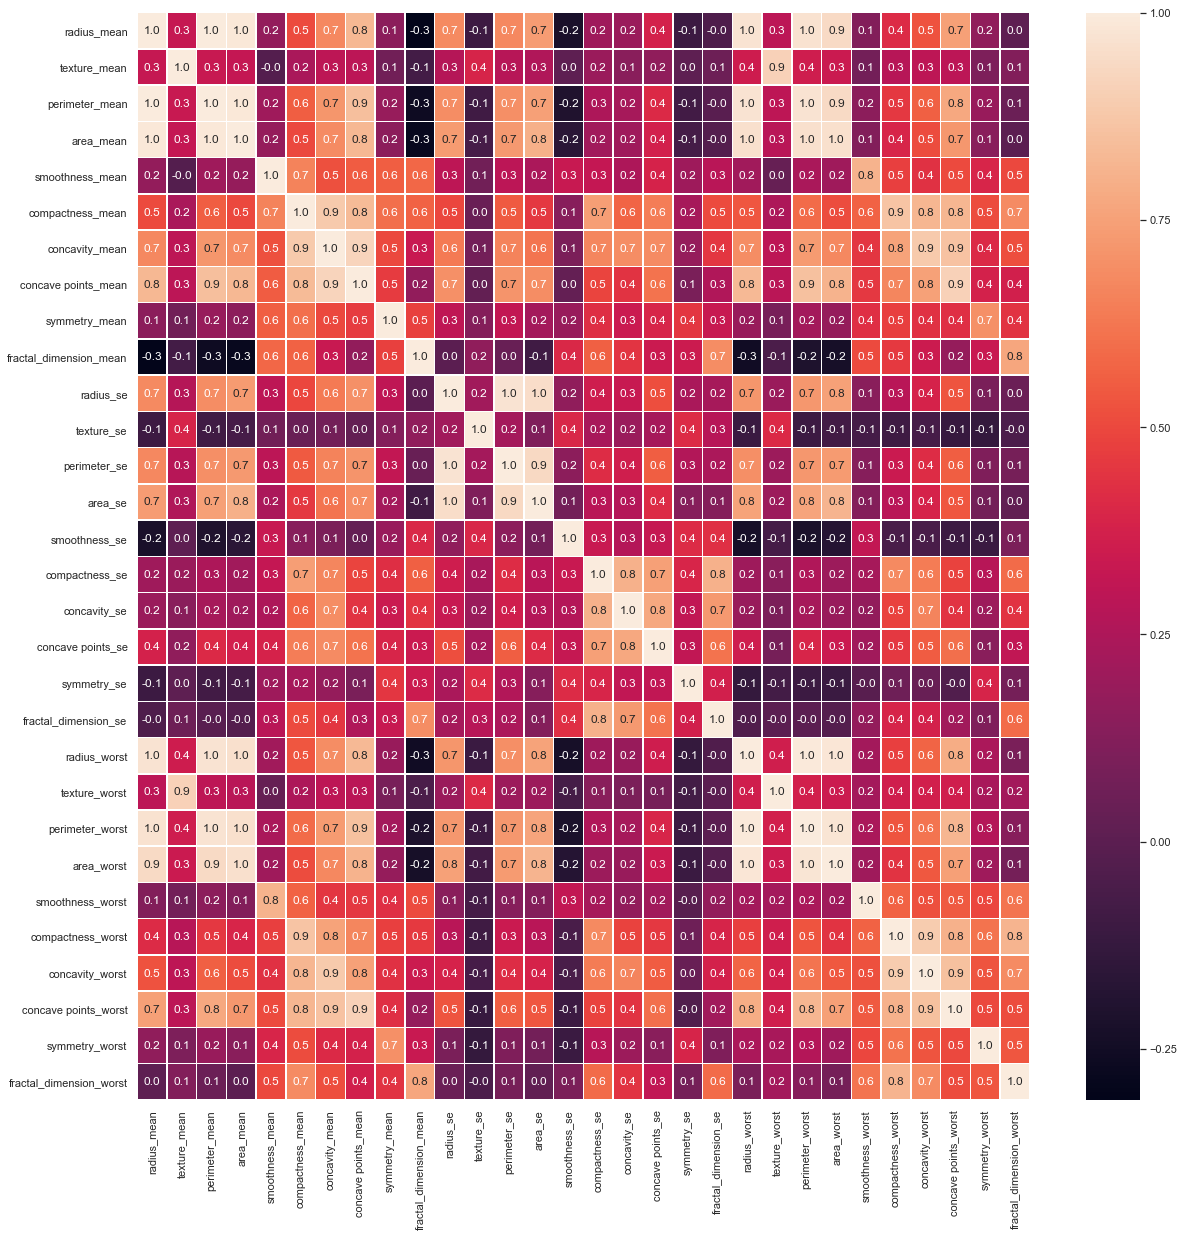

In [31]:
f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(x.corr(),annot=True, linewidth=.5, fmt='.1f', ax=ax);

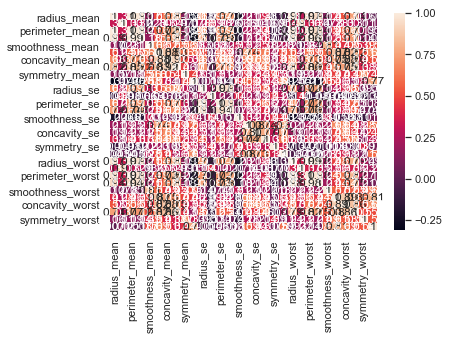

In [36]:
sns.heatmap(x.corr(),annot=True)